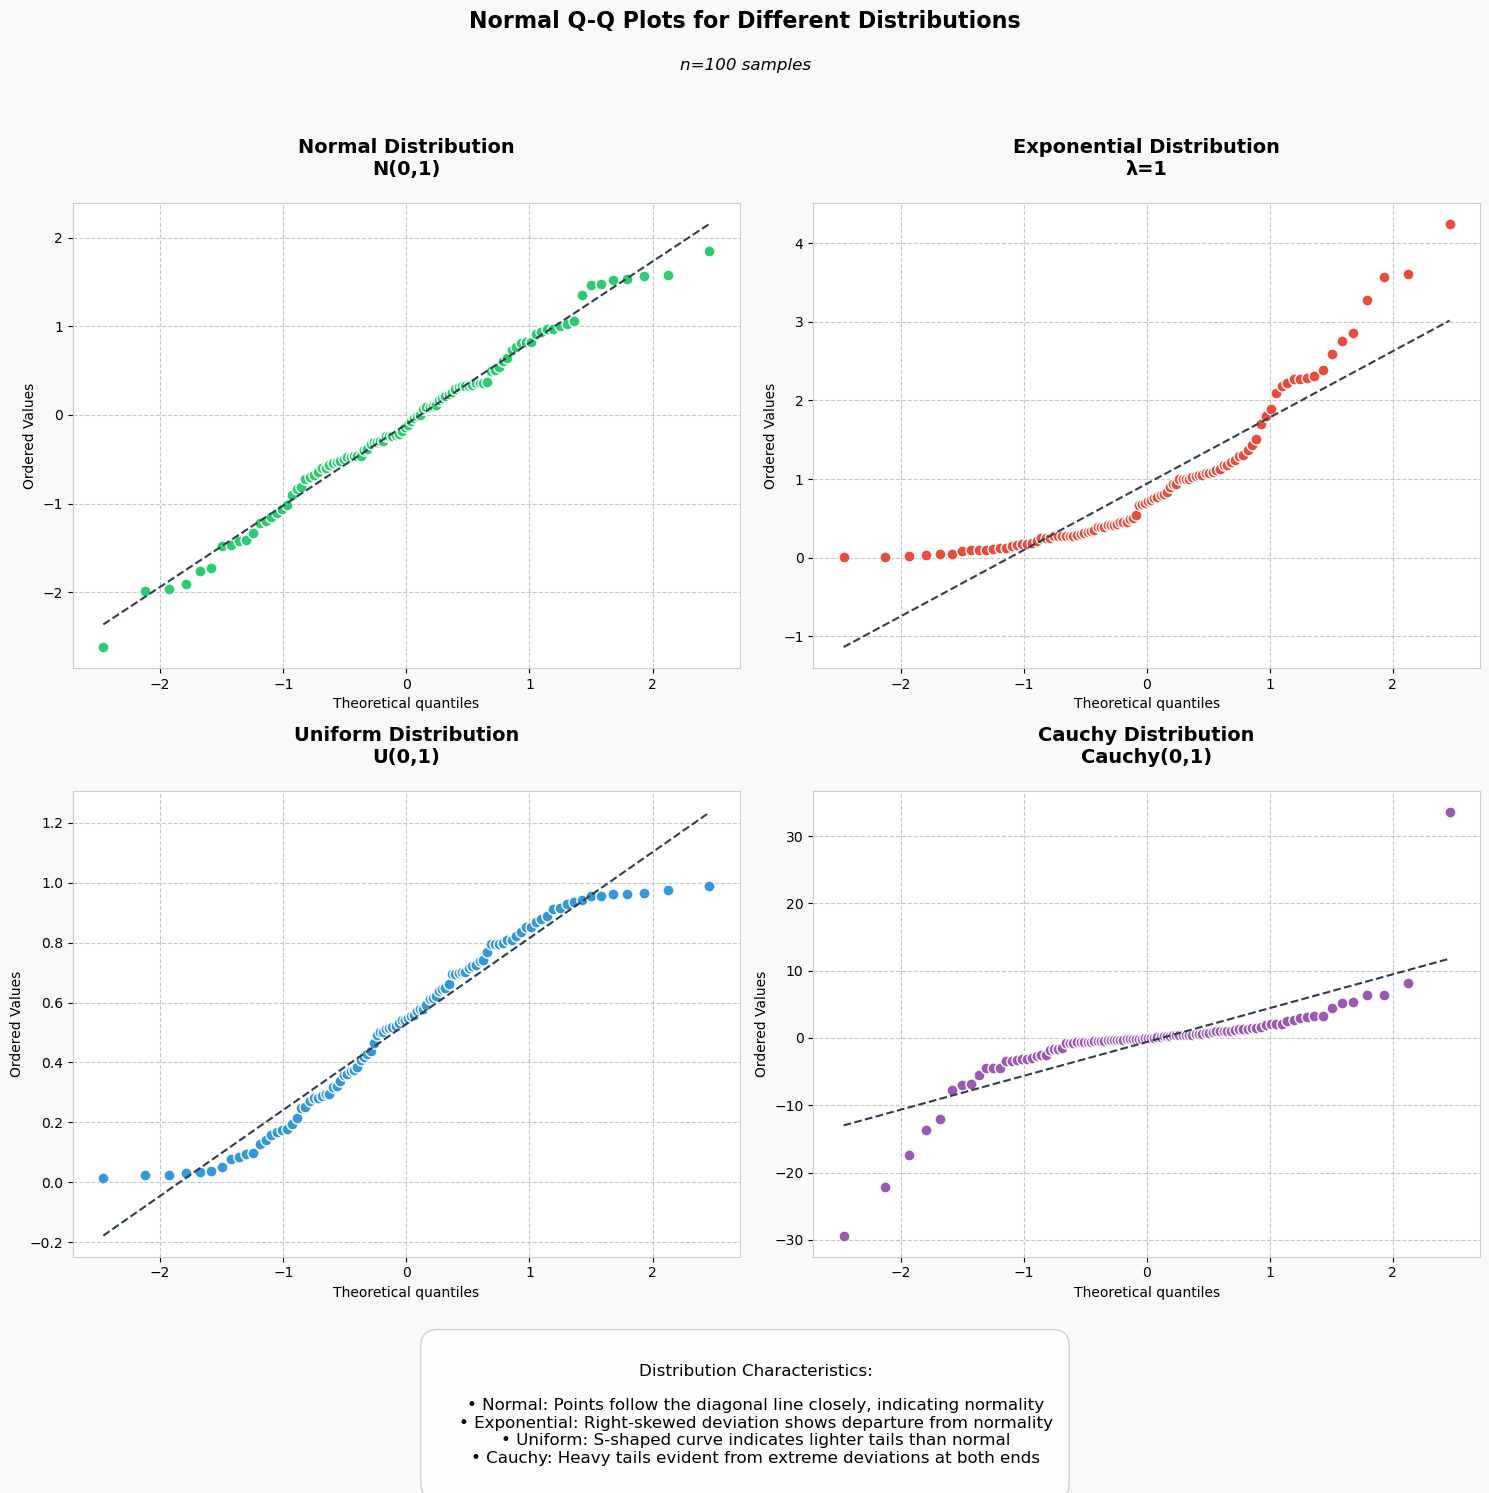


Detailed Distribution Characteristics

Normal Distribution:
  • Symmetric around mean
  • Bell-shaped curve
  • Q-Q plot follows y=x line closely
  • Finite moments exist

Exponential Distribution:
  • Right-skewed
  • One parameter (rate λ)
  • Always positive values
  • Memory-less property

Uniform Distribution:
  • Constant probability density
  • Bounded support
  • No tails
  • Maximum entropy for bounded interval

Cauchy Distribution:
  • Heavy-tailed
  • No finite moments exist
  • Symmetric but with extreme outliers
  • Self-similar under linear combinations



In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

def create_qq_plots(n_samples=100, seed=42):
    """
    Create aesthetically pleasing Q-Q plots for different distributions.
    
    Parameters:
    -----------
    n_samples : int, default=100
        Number of samples to generate for each distribution
    seed : int, default=42
        Random seed for reproducibility
    """
    # Set style and random seed

    np.random.seed(seed)
    
    # Create figure with subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))
    fig.set_facecolor('#f8f9fa')
    
    # Custom colors
    colors = ['#2ecc71', '#e74c3c', '#3498db', '#9b59b6']
    line_color = '#2c3e50'
    
    # Common styling function
    def style_axis(ax, title, color):
        ax.set_title(title, fontsize=14, pad=20, fontweight='bold', 
                    fontfamily='sans-serif')
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.set_facecolor('white')
        for spine in ax.spines.values():
            spine.set_color('#cccccc')
        
        # Style the Q-Q plot points and line
        ax.get_lines()[0].set_markerfacecolor(color)
        ax.get_lines()[0].set_markeredgecolor('white')
        ax.get_lines()[0].set_markersize(8)
        ax.get_lines()[1].set_color(line_color)
        ax.get_lines()[1].set_linestyle('--')
    
    # 1. Normal Distribution
    normal_data = np.random.normal(0, 1, n_samples)
    stats.probplot(normal_data, dist="norm", plot=ax1)
    style_axis(ax1, "Normal Distribution\nN(0,1)", colors[0])
    
    # 2. Exponential Distribution
    exp_data = np.random.exponential(1, n_samples)
    stats.probplot(exp_data, dist="norm", plot=ax2)
    style_axis(ax2, "Exponential Distribution\nλ=1", colors[1])
    
    # 3. Uniform Distribution
    unif_data = np.random.uniform(0, 1, n_samples)
    stats.probplot(unif_data, dist="norm", plot=ax3)
    style_axis(ax3, "Uniform Distribution\nU(0,1)", colors[2])
    
    # 4. Cauchy Distribution
    cauchy_data = stats.cauchy.rvs(loc=0, scale=1, size=n_samples)
    stats.probplot(cauchy_data, dist="norm", plot=ax4)
    style_axis(ax4, "Cauchy Distribution\nCauchy(0,1)", colors[3])
    
    # Main title
    plt.suptitle("Normal Q-Q Plots for Different Distributions",
                 fontsize=16, y=0.95, fontweight='bold', 
                 fontfamily='sans-serif')
    
    # Subtitle
    plt.figtext(0.5, 0.91, f"n={n_samples} samples",
                ha='center', fontsize=12, style='italic')
    
    # Add explanatory text with styled box
    explanation = """
    Distribution Characteristics:
    
    • Normal: Points follow the diagonal line closely, indicating normality
    • Exponential: Right-skewed deviation shows departure from normality
    • Uniform: S-shaped curve indicates lighter tails than normal
    • Cauchy: Heavy tails evident from extreme deviations at both ends
    """
    
    plt.figtext(0.5, -0.03, explanation, fontsize=12, ha='center',
                bbox=dict(facecolor='white', alpha=0.9, 
                         edgecolor='#cccccc', boxstyle='round,pad=1'))
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.08, 1, 0.9])
    
    return fig

# Create and display the plot
fig = create_qq_plots()
plt.show()

# Print detailed insights with formatting
def print_distribution_insights():
    insights = {
        "Normal Distribution": [
            "Symmetric around mean",
            "Bell-shaped curve",
            "Q-Q plot follows y=x line closely",
            "Finite moments exist"
        ],
        "Exponential Distribution": [
            "Right-skewed",
            "One parameter (rate λ)",
            "Always positive values",
            "Memory-less property"
        ],
        "Uniform Distribution": [
            "Constant probability density",
            "Bounded support",
            "No tails",
            "Maximum entropy for bounded interval"
        ],
        "Cauchy Distribution": [
            "Heavy-tailed",
            "No finite moments exist",
            "Symmetric but with extreme outliers",
            "Self-similar under linear combinations"
        ]
    }
    
    print("\n" + "="*50)
    print("Detailed Distribution Characteristics")
    print("="*50 + "\n")
    
    for dist, points in insights.items():
        print(f"{dist}:")
        for point in points:
            print(f"  • {point}")
        print()

print_distribution_insights()

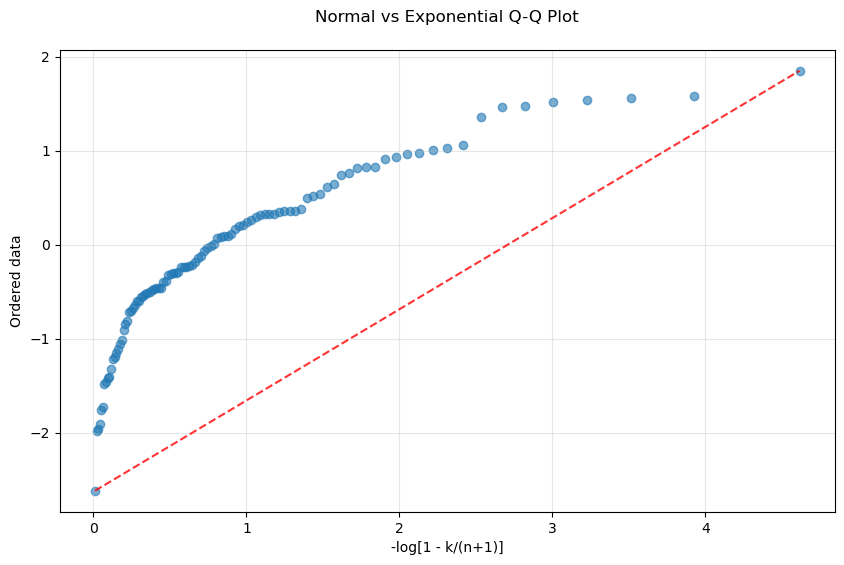

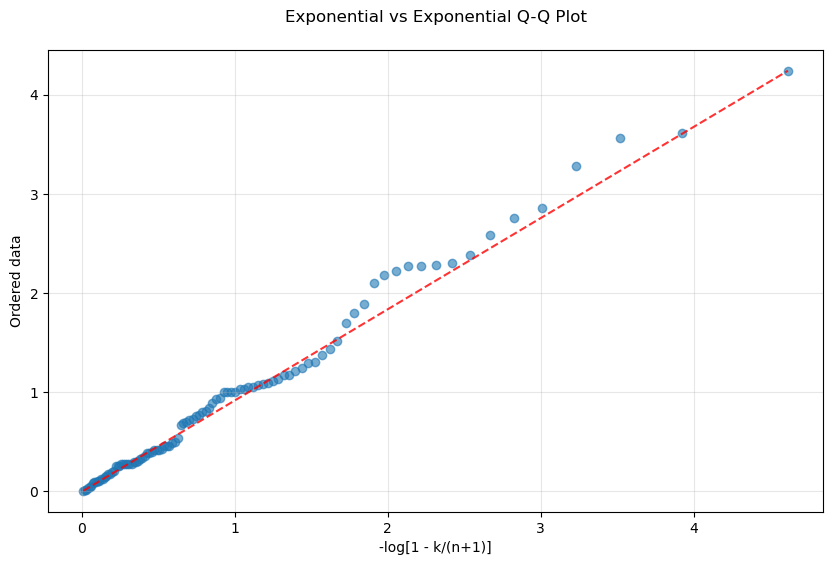

In [23]:
def create_exponential_qq_plot(data, title="Exponential Q-Q Plot"):
    """
    Create a custom exponential Q-Q plot.
    
    Parameters:
    -----------
    data : array-like
        Input data to be analyzed
    title : str
        Plot title
    """
    n = len(data)
    k = np.arange(1, n + 1)
    
    # Sort the data
    sorted_data = np.sort(data)
    
    # Calculate theoretical quantiles
    theoretical_quantiles = -np.log(1 - k/(n + 1))
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(theoretical_quantiles, sorted_data, alpha=0.6)
    plt.plot([min(theoretical_quantiles), max(theoretical_quantiles)],
             [min(sorted_data), max(sorted_data)], 'r--', alpha=0.8)
    
    plt.title(title, fontsize=12, pad=20)
    plt.xlabel("-log[1 - k/(n+1)]")
    plt.ylabel("Ordered data")
    plt.grid(True, alpha=0.3)
    plt.show()

# Generate normal data
np.random.seed(42)
n = 100
normal_data = np.random.normal(0, 1, n)
create_exponential_qq_plot(normal_data, "Normal vs Exponential Q-Q Plot")

# Generate exponential data
exp_data = np.random.exponential(1, n)
create_exponential_qq_plot(exp_data, "Exponential vs Exponential Q-Q Plot")
